<a href="https://colab.research.google.com/github/Afealete/FOXTROT-2-ASSIGNMENT-2/blob/main/Copy_of_FOXTROT_2_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study – Banking & Loans in Ghana

In today’s competitive and digitally driven financial environment, the ability to predict credit risk is a strategic advantage. GhanaLoanConnect, a digital lending platform connecting borrowers to investors, is actively seeking data-driven solutions to reduce its rate of non-performing loans (NPLs). Rising default rates not only impact profitability but also weaken lender trust and reduce platform credibility

To address this challenge, this project proposes the development of a machine learning model that can predict the likelihood of a borrower defaulting on a loan. With accurate predictions, GhanaLoanConnect can proactively minimize risk, prioritize low-risk borrowers, and enhance portfolio performance.

## Import common libraries

In [2]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 7.8 MB/s eta 0:00:00


In [23]:
# to handle the data
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder

# machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score

# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import fairlearn for fairness assessment and mitigation
from fairlearn.metrics import MetricFrame,demographic_parity_difference,equalized_odds_difference
from fairlearn.reductions import GridSearch,EqualizedOdds #Using EqualizedOdds as constraint


## Load dataset

In [24]:
# Reading the dataset into the content folder
from google.colab import files
uploaded = files.upload()

#
data = pd.read_csv('/content/loan_borowwer_data.csv')
data



# 1. Define the sensitive attribute(s)
sensitive_attribute_name = 'fico' # Name for printing
A = data[[sensitive_attribute_name]] # Extract the sensitive attribute column(s)

# Exclude sensitive attribute from features
X = data.drop(['credit.policy', sensitive_attribute_name], axis=1)
y = data['credit.policy']

Saving loan_borowwer_data.csv to loan_borowwer_data (2).csv


# 1.Exploratory Data Analysis


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
# Check for missing values
print(data.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


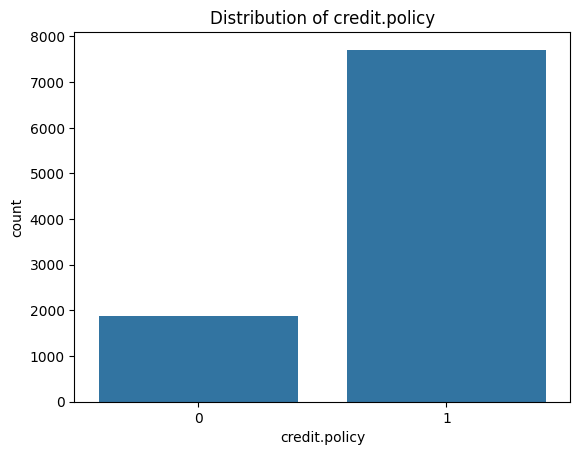

In [ ]:
# Visualize the distribution of the target variable (credit.policy)
sns.countplot(x='credit.policy', data=data)
plt.title('Distribution of credit.policy')
plt.show()

## 2. Data Preprocessing

In [25]:
# One hot encoding for 'purpose' since is the only one with strings
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

# Verify the changes
print(data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

Distribution of credit.policy after oversampling:
credit.policy
1    7710
0    7710
Name: count, dtype: int64


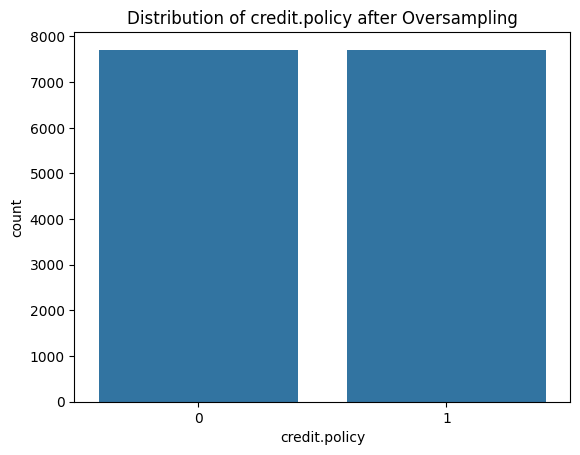

In [26]:
# Scaling to get equal distributions
from imblearn.over_sampling import RandomOverSampler

# Separate features and target
X = data.drop('credit.policy', axis=1)
y = data['credit.policy']

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Display the new distribution
print("Distribution of credit.policy after oversampling:")
print(y_resampled.value_counts())

# Visualizing the new distribution
sns.countplot(x=y_resampled)
plt.title('Distribution of credit.policy after Oversampling')
plt.show()

## 3. Feature Engineering

In [27]:
# 1
data['int_rate_fico'] = data['int.rate'] * data['fico']

# 2
data['revol_bal_to_inc_ratio'] = data['revol.bal'] / np.exp(data['log.annual.inc'])

# 3
data['inquiries_per_year'] = data['inq.last.6mths'] / (data['days.with.cr.line'] / 365.25)

# 4
data['negative_credit_events'] = data['delinq.2yrs'] + data['pub.rec']

# 5
data['fico_inverse'] = 1 / data['fico']

data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,int_rate_fico,revol_bal_to_inc_ratio,inquiries_per_year,negative_credit_events,fico_inverse
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,True,False,False,False,False,87.6293,0.339459,0.000000,0,0.001357
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,...,False,False,False,False,False,75.7197,0.517277,0.000000,0,0.001414
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,...,True,False,False,False,False,92.5474,0.109719,0.077548,0,0.001466
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,...,True,False,False,False,False,71.7696,0.396082,0.135280,0,0.001404
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,...,False,False,False,False,False,95.1142,0.058663,0.000000,1,0.001499


###1. Interaction term between 'int.rate' and 'fico'.
Rationale: The interest rate a person receives is often influenced by their credit score (FICO).
 An interaction term can capture how these two features jointly affect the target variable.

###2. A ratio of 'revol.bal' to 'log.annual.inc'.
Rationale: This ratio can represent the proportion of revolving balance relative to annual income, which might indicate financial strain or leverage.

###3. A feature representing the number of inquiries per year.
 Rationale: While 'inq.last.6mths' captures recent inquiries, understanding the frequency over the
 entire credit history ('days.with.cr.line') might be a better indicator of credit-seeking behavior.
 Convert days to years by dividing by 365.25 to account for leap years.

###4. A combined feature for negative credit events.
Rationale: Summing up 'delinq.2yrs' and 'pub.rec' can create a single metric for past negative credit history.

###5. A feature for the inverse of FICO score.
 Rationale: Sometimes, the relationship between a score and the target is not linear. The inverse might capture this non-linearity.

## 4. Model Selection and Training



--- Logistic Regression ---
Accuracy : 0.894919972164231
Precision: 0.9125974558883874
Recall   : 0.9615218331171639
F1 Score : 0.9364210526315789
ROC-AUC  : 0.908607706730847


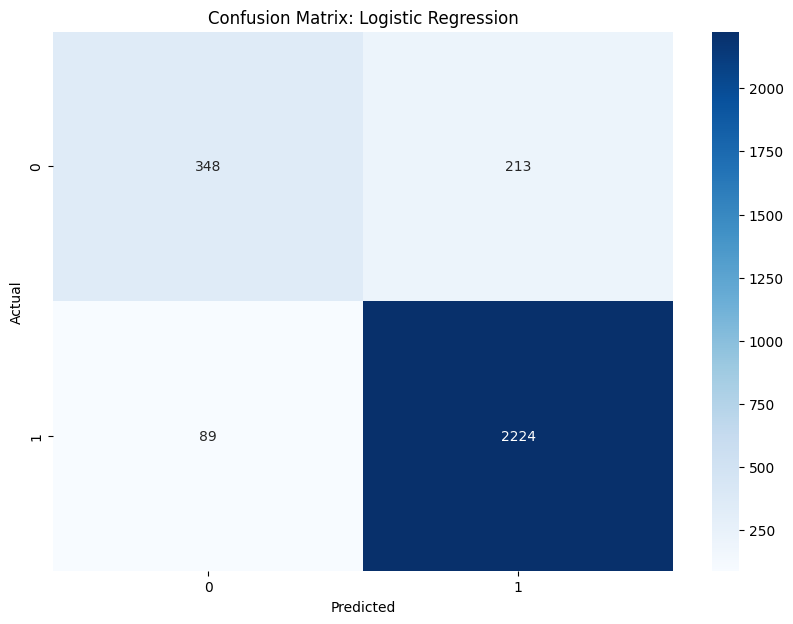


--- Random Forest ---
Accuracy : 0.9930410577592206
Precision: 0.993968117190866
Recall   : 0.9974059662775616
F1 Score : 0.9956840742339231
ROC-AUC  : 0.9992462967972237


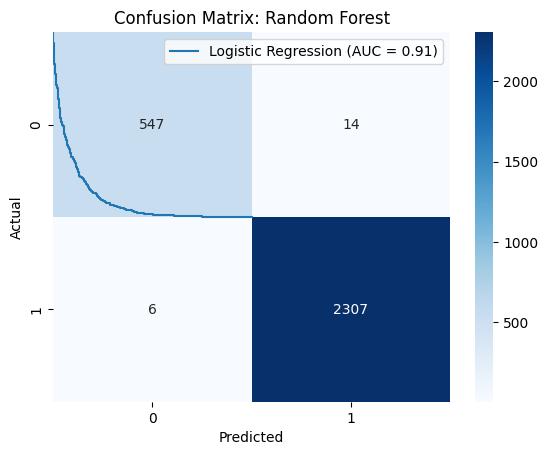


--- Gradient Boosting ---
Accuracy : 0.9958246346555324
Precision: 0.9961190168175937
Recall   : 0.9987029831387808
F1 Score : 0.9974093264248705
ROC-AUC  : 0.998334223442944


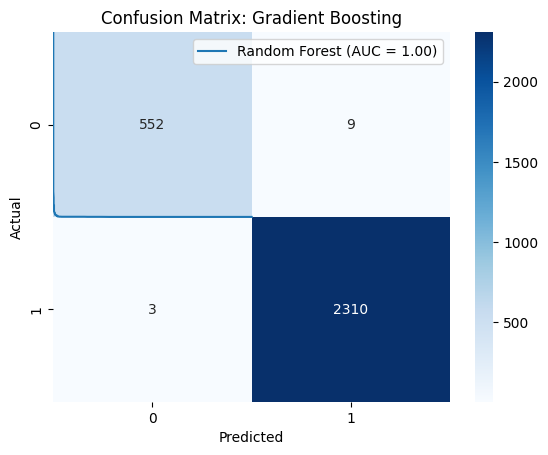

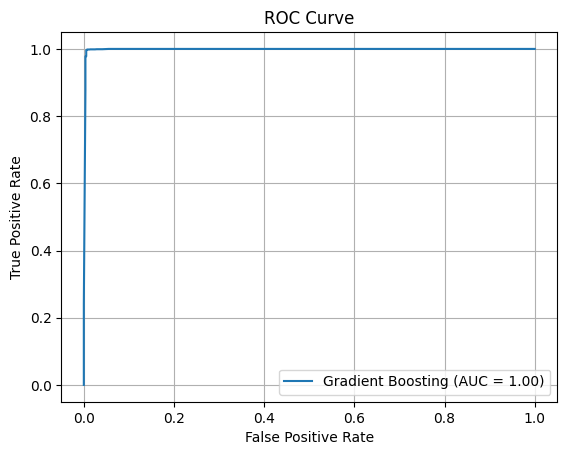

In [36]:

# 1. Data split
X = data.drop(['credit.policy', sensitive_attribute_name], axis=1)
y = data['credit.policy']
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(
    X, y, A, test_size=0.3, random_state=42, stratify=y
)

# 2. Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 3. Evaluation function
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # for ROC-AUC and ROC curve

    print(f"\n--- {name} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()


    if name == 'Logistic Regression':
        return y_pred, y_proba
    else:
        return None, None

# 4. Evaluate all models
plt.figure(figsize=(10, 7))
y_pred_lr = None
y_proba_lr = None
for name, model in models.items():
    y_pred, y_proba = evaluate_model(name, model)
    # Capture the results for Logistic Regression
    if name == 'Logistic Regression':
        y_pred_lr = y_pred
        y_proba_lr = y_proba
        roc_auc_lr = roc_auc_score(y_test, y_proba)

plt.grid(True)
plt.show()


BIAS DETECTION AND FAIRNESS AUDITS

In [37]:
print("\n--- Fairness Assessment of Logistic Regression Model (Unmitigated) ---")

# Evaluate fairness metrics using MetricFrame, grouped by the sensitive attribute
grouped_on_credit_policy = MetricFrame(metrics={
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'roc_auc': roc_auc_score
}, y_true=y_test, y_pred=y_pred_lr, sensitive_features=A_test)

print(f"\nPerformance metrics grouped by '{sensitive_attribute_name}':")
print(grouped_on_credit_policy.by_group.to_markdown())

# Calculate fairness disparities
dem_parity_diff = demographic_parity_difference(y_true=y_test, y_pred=y_pred_lr, sensitive_features=A_test)
eq_odds_diff = equalized_odds_difference(y_true=y_test, y_pred=y_pred_lr, sensitive_features=A_test)

print(f"\nDemographic Parity Difference (y_pred): {dem_parity_diff:.4f}")
print(f"Equalized Odds Difference (y_pred): {eq_odds_diff:.4f}")

print("\n--- Training Logistic Regression with Bias Mitigation (Equalized Odds) ---")

# Ensure Pipeline is imported
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify numerical and categorical features excluding the sensitive attribute
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
# Exclude the sensitive attribute from numerical features if it was numerical
if sensitive_attribute_name in numerical_features:
    numerical_features.remove(sensitive_attribute_name)

categorical_features = X_train.select_dtypes(include='object').columns.tolist()

# Create a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the unmitigated estimator within the pipeline
# This pipeline will be used by GridSearch as the base estimator
unmitigated_estimator = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])

# GridSearch aims to find a predictor that satisfies approximate fairness constraints
# It explores a grid of Lagrange multipliers to find optimal trade-offs between accuracy and fairness.
mitigated_estimator = GridSearch(
    unmitigated_estimator,
    constraints=EqualizedOdds(),
    grid_size=60,
    sample_weight_name="classifier__sample_weight"
)

# Fitting the mitigated estimator.
mitigated_estimator.fit(X_train, y_train, sensitive_features=A_train)

# Make predictions with the mitigated model
y_pred_mitigated = mitigated_estimator.predict(X_test)
y_proba_mitigated = mitigated_estimator.predict_proba(X_test)[:, 1] # Get probabilities for ROC-AUC

# Evaluate standard performance metrics for the mitigated Logistic Regression
accuracy_mitigated = accuracy_score(y_test, y_pred_mitigated)
precision_mitigated = precision_score(y_test, y_pred_mitigated)
recall_mitigated = recall_score(y_test, y_pred_mitigated)
f1_mitigated = f1_score(y_test, y_pred_mitigated)
roc_auc_mitigated = roc_auc_score(y_test, y_proba_mitigated)

print(f"\nMitigated Model Performance:")
print(f"Accuracy: {accuracy_mitigated:.4f}")
print(f"Precision: {precision_mitigated:.4f}")
print(f"Recall: {recall_mitigated:.4f}")
print(f"F1-Score: {f1_mitigated:.4f}")
print(f"ROC-AUC: {roc_auc_mitigated:.4f}")

print("\n--- Fairness Assessment of Mitigated Logistic Regression Model ---")

# Evaluate fairness metrics using MetricFrame for the mitigated model
grouped_on_credit_policy_mitigated = MetricFrame(metrics={
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'roc_auc': roc_auc_score
}, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=A_test)

print(f"\nPerformance metrics grouped by '{sensitive_attribute_name}' (Mitigated Model):")
print(grouped_on_credit_policy_mitigated.by_group.to_markdown())

dem_parity_diff_mitigated = demographic_parity_difference(y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=A_test)
eq_odds_diff_mitigated = equalized_odds_difference(y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=A_test)

print(f"\nDemographic Parity Difference (y_pred, Mitigated): {dem_parity_diff_mitigated:.4f}")
print(f"Equalized Odds Difference (y_pred, Mitigated): {eq_odds_diff_mitigated:.4f}")

print("\n--- Summary of Fairness and Performance Trade-off ---")
print(f"Unmitigated Equalized Odds Difference: {eq_odds_diff:.4f}")
print(f"Mitigated Equalized Odds Difference:   {eq_odds_diff_mitigated:.4f}")
print(f"Improvement in Equalized Odds Difference: {abs(eq_odds_diff - eq_odds_diff_mitigated):.4f}")

print(f"\nUnmitigated ROC-AUC: {roc_auc_lr:.4f}")
print(f"Mitigated ROC-AUC:   {roc_auc_mitigated:.4f}")
print(f"Change in ROC-AUC: {roc_auc_mitigated - roc_auc_lr:.4f}")

print("\n**Interpretation:**")
print("The 'Equalized Odds Difference' measures how much the true positive rate and false positive rate vary across different groups of the sensitive attribute. A smaller difference indicates better fairness.")
print("Comparing the 'Unmitigated' and 'Mitigated' results will show if the bias mitigation technique reduced this difference, ideally without significantly sacrificing overall model performance (e.g., ROC-AUC).")







--- Fairness Assessment of Logistic Regression Model (Unmitigated) ---

Performance metrics grouped by 'fico':
|   fico |   accuracy |   precision |   recall |       f1 |    roc_auc |
|-------:|-----------:|------------:|---------:|---------:|-----------:|
|    632 |   1        |    0        | 0        | 0        | nan        |
|    642 |   0.357143 |    0        | 0        | 0        | nan        |
|    647 |   0.575    |    0        | 0        | 0        | nan        |
|    652 |   0.371429 |    0        | 0        | 0        | nan        |
|    657 |   0.390244 |    0        | 0        | 0        | nan        |
|    662 |   0.863309 |    0.92381  | 0.898148 | 0.910798 |   0.820042 |
|    667 |   0.87218  |    0.909091 | 0.918367 | 0.913706 |   0.830612 |
|    672 |   0.863636 |    0.912088 | 0.892473 | 0.902174 |   0.843672 |
|    677 |   0.903226 |    0.927835 | 0.947368 | 0.9375   |   0.852995 |
|    682 |   0.921986 |    0.940678 | 0.965217 | 0.95279  |   0.847993 |
|    687 |  


Mitigated Model Performance:
Accuracy: 0.8302
Precision: 0.8508
Recall: 0.9568
F1-Score: 0.9007
ROC-AUC: 0.7297

--- Fairness Assessment of Mitigated Logistic Regression Model ---

Performance metrics grouped by 'fico' (Mitigated Model):
|   fico |   accuracy |   precision |   recall |       f1 |    roc_auc |
|-------:|-----------:|------------:|---------:|---------:|-----------:|
|    632 |   1        |    0        | 0        | 0        | nan        |
|    642 |   0.25     |    0        | 0        | 0        | nan        |
|    647 |   0.3      |    0        | 0        | 0        | nan        |
|    652 |   0.2      |    0        | 0        | 0        | nan        |
|    657 |   0.268293 |    0        | 0        | 0        | nan        |
|    662 |   0.748201 |    0.823009 | 0.861111 | 0.841629 |   0.607975 |
|    667 |   0.714286 |    0.754237 | 0.908163 | 0.824074 |   0.539796 |
|    672 |   0.757576 |    0.796117 | 0.88172  | 0.836735 |   0.671629 |
|    677 |   0.83871  |    0.83